<a href="https://colab.research.google.com/github/vani-it21/DAYSKILL2/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.deterministic import DeterministicProcess
plt.style.use("seaborn-whitegrid")

<ipython-input-17-7406fd69edcc>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
data=pd.read_csv('/content/spy.csv')

In [4]:
data

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,25.047169,25.047169,24.922556,25.029367,1003200,29,4,4,1,1993
1,1993-02-01,25.047171,25.207388,25.047171,25.207388,480500,1,0,5,2,1993
2,1993-02-02,25.189590,25.278599,25.136185,25.260798,201300,2,1,5,2,1993
3,1993-02-03,25.296384,25.545609,25.278582,25.527807,529400,3,2,5,2,1993
4,1993-02-04,25.616828,25.688036,25.331999,25.634630,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
7674,2023-07-24,453.369995,455.040009,452.299988,454.200012,54023400,24,0,30,7,2023
7675,2023-07-25,453.920013,456.739990,453.869995,455.440002,55191200,25,1,30,7,2023
7676,2023-07-26,454.470001,456.989990,453.380005,455.510010,71052900,26,2,30,7,2023
7677,2023-07-27,459.019989,459.440002,451.549988,452.489990,92194400,27,3,30,7,2023


<Axes: >

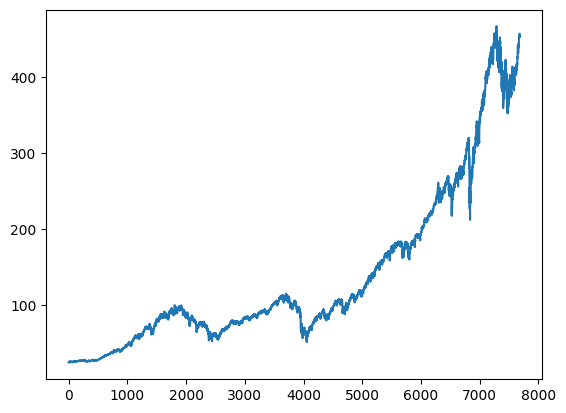

In [5]:
data['Close'].plot()

In [6]:
train_data=data.iloc[:int(.99*len(data)),:]
test_data=data.iloc[int(.99*len(data)):,:]

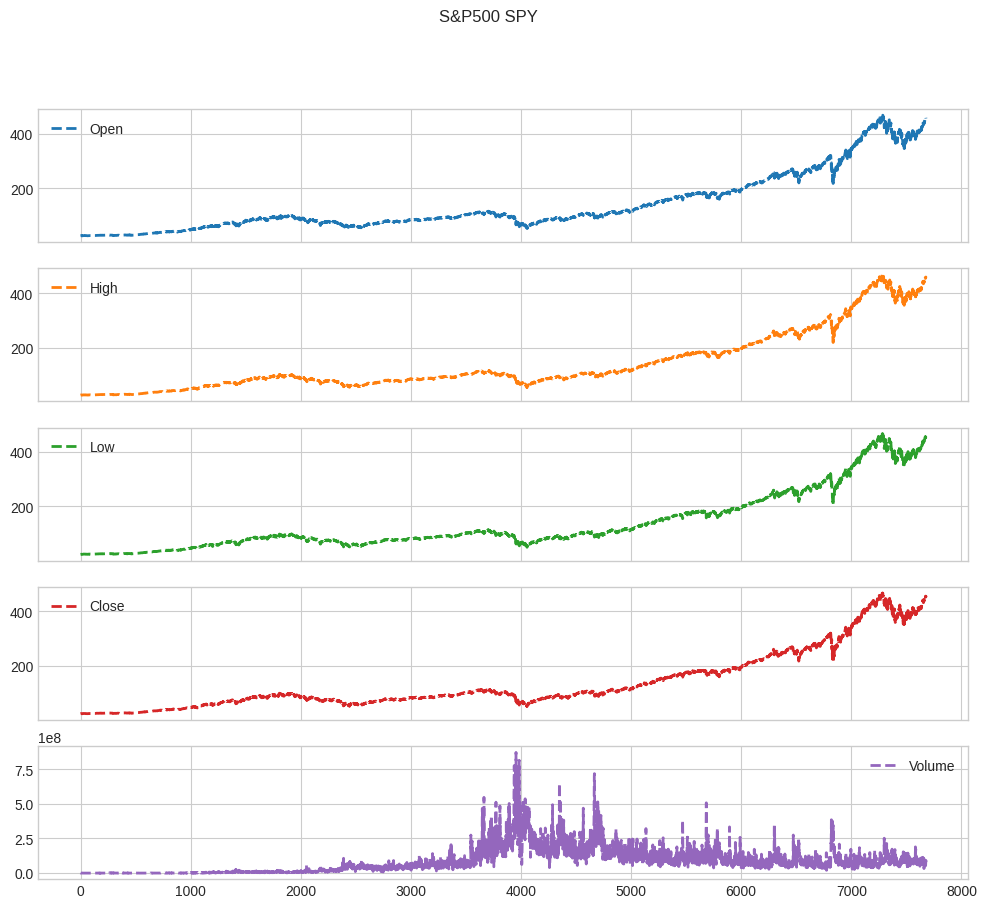

In [12]:
features = ['Open','High','Low','Close','Volume']
data[features].plot(subplots=True,figsize=(12,10),title='S&P500 SPY',linestyle='--',linewidth=2)
plt.show()

<Axes: xlabel='Year'>

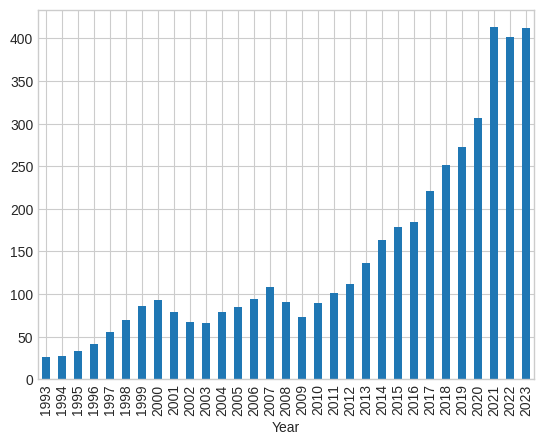

In [14]:
data.groupby('Year')['Close'].mean().plot(kind = 'bar')

In [16]:
year = data[data.Year == 2022]
year.head().style.set_precision(2).background_gradient(cmap="YlGnBu")

<ipython-input-16-b4983de9516c>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  year.head().style.set_precision(2).background_gradient(cmap="YlGnBu")


,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
7285,2022-01-03,465.19,466.70,462.79,466.56,72668200,3,0,1,1,2022
7286,2022-01-04,468.04,468.78,464.48,466.41,71178700,4,1,1,1,2022
7287,2022-01-05,466.03,466.83,457.35,457.45,104538900,5,2,1,1,2022
7288,2022-01-06,456.97,459.83,454.57,457.02,86858900,6,3,1,1,2022
7289,2022-01-07,457.03,458.25,453.81,455.21,85111600,7,4,1,1,2022


In [18]:
year['Time'] = np.arange(len(year.index))

<ipython-input-18-0096ada8a171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['Time'] = np.arange(len(year.index))


Text(0.5, 1.0, 'Time plot of SPY Closing Price during 2022')

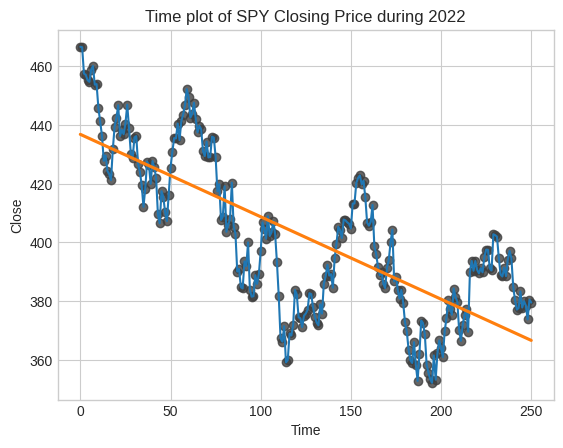

In [19]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=year)
ax = sns.regplot(x='Time', y='Close', data=year, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of SPY Closing Price during 2022')

In [20]:
print("Price at the beginning of the year:" , year.Close[7285].round(2))
print("Price at the end of the year:" , year.Close[7535].round(2))
print("Price drop:", (year.Close[7285] - year.Close[7535]).round(2))

Price at the beginning of the year: 466.56
Price at the end of the year: 379.57
Price drop: 87.0


In [21]:
y = data['Close']
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
y_pred = pd.Series(model.predict(X), index=X.index)

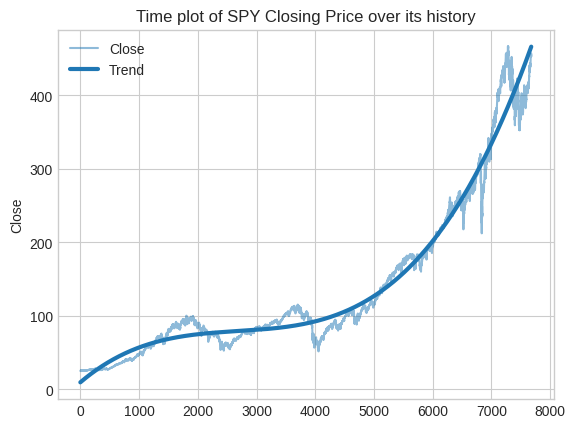

In [24]:
ax = y.plot(alpha=0.5, title="Time plot of SPY Closing Price over its history", ylabel="Close")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend()

In [25]:
model.score(X,y)

0.9714429251884877

In [28]:
data.Close.tail(1)


7678    456.920013
Name: Close, dtype: float64

In [29]:
y_pred.tail(1).round(2)

7678    466.13
dtype: float64